In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
def createEventDistributionUber(xLim,yLim,startTime, endTime, probabilityMatrix, eventTimeWindow,printLog):
    eventPos = []
    eventTimes = []
    firstTime = startTime  # each time is a quarter of an hour
    numTimeSteps = endTime - startTime
    numEventsPerTime = []
    for t in range(numTimeSteps):
        totNumEvents = 0
        for x in range(xLim[1]-xLim[0]):
            for y in range(yLim[1]-yLim[0]):
                randNum = np.random.uniform(0, 1)
                cdfNumEvents = probabilityMatrix[x, y, t + firstTime, :]
                # find how many events are happening at the same time
                numEvents = np.searchsorted(cdfNumEvents, randNum, side='left')
                numEvents = np.floor(numEvents).astype(int)
                if printLog:
                    print('at loc:' + str(x) + ',' + str(y) + ' num events:' + str(numEvents))
                for n in range(numEvents):
                    eventPos.append(np.array([x, y]))
                    eventTimes.append(t + firstTime)
                    totNumEvents += 1
        #print("tot num events per time:"+str(t)+", is:"+str(totNumEvents))
        numEventsPerTime.append(totNumEvents)
    plt.plot(range(numTimeSteps),numEventsPerTime)
    for i in range(24):
        plt.plot([i*12,i*12],[-5,180],c='b',alpha=0.5,linestyle='--')
        plt.text(i*12,0,str(i))
    plt.xlabel('time')
    plt.ylabel('num events per time')
    plt.show()
    print('average amount of events:'+str(np.mean(np.array(numEventsPerTime))))
    eventsPos = np.array(eventPos)
    eventTimes = np.array(eventTimes)
    eventsTimeWindow = np.column_stack([eventTimes, eventTimes + eventTimeWindow])
    if printLog:
        for i in range(endTime - startTime):
            numEventsPerTime = np.size(np.where(eventTimes==i))
            print('num events per time :'+str(i)+' is :'+str(numEventsPerTime))
    return eventsPos, eventsTimeWindow

In [4]:
def plotEventDistribution(eventsPos, eventsTimeWindow,t):
    eventTimes   = eventsTimeWindow[:,0]
    numEvents    = 0
    tempEventPos = [eventPos[i] for i in range(len(eventTimes)) if eventTimes[i] == t]
    for x, y in tempEventPos:
        numEvents += 1
        plt.scatter(x,y,s = 35)
        plt.text(x, y, 't=' + str(t),fontsize=15)
        plt.rcParams['figure.figsize'] = [10, 10]
        plt.xlim([0,np.max(eventPos[:,0])])
        plt.ylim([0,np.max(eventPos[:,1])])
        plt.tick_params(axis='both', which='major', labelsize=20)
    print("number of events at time t:"+str(numEvents))
    plt.show()
    return 

In [6]:
def plotEventDistributionTimeWindow(eventsPos, eventsTimeWindow,tMax):
    eventTimes   = eventsTimeWindow[:,0]
    numEvents    = 0
    
    for t in range(tMax):
        tempEventPos = [eventPos[i] for i in range(len(eventTimes)) if eventTimes[i] == t]
        for x, y in tempEventPos:
            numEvents += 1
            plt.scatter(x,y,s = 35)
            plt.text(x, y, 't=' + str(t),fontsize=15)
            plt.rcParams['figure.figsize'] = [10, 10]
            plt.xlim([0,np.max(eventPos[:,0])+2])
            plt.ylim([0,np.max(eventPos[:,1])+2])
            plt.tick_params(axis='both', which='major', labelsize=20)
    print("number of events at time t:"+str(numEvents))
    plt.show()
    return 

(21, 72, 288, 11)


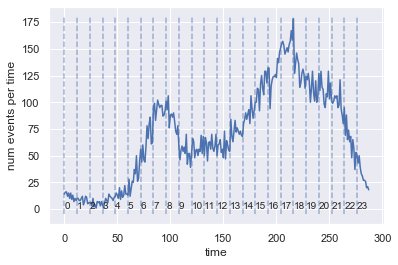

average amount of events:68.89583333333333


In [8]:
starTime = 0
endTime = 288
probabilityMatrix = np.load('4D_UpdatedGrid_5min_250grid_LimitedProbability_CDFMat_wday_1.p', allow_pickle=True)
print(probabilityMatrix.shape)
xLim = [0,21]
yLim = [0,70]
probabilityMatrix1 = probabilityMatrix[xLim[0]:xLim[1],yLim[0]:yLim[1],:]
eventTimeWindow = 4

eventPos,eventTime = createEventDistributionUber(xLim,yLim,starTime, endTime, probabilityMatrix1, eventTimeWindow,False)


number of events at time t:9


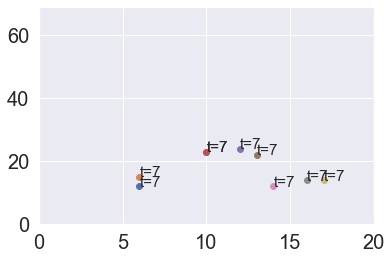

In [9]:
plotEventDistribution(eventPos, eventTime,7)

In [10]:
probabilityMatrix.shape[1]

72